 1. Import data and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
stim = np.genfromtxt('MDA1_data/stim.txt')
spikes = np.genfromtxt('MDA1_data/spikes.txt')

In [3]:
spikes.shape

(25, 42600)

2. Reshape response data into response matrix

In [4]:
tau = 30
N_train = 1000
R_train = np.empty([N_train, 2*tau*25+1])
for cell in range(25):
    R_train[:,0]=1
    for t in range(N_train):
        R_train[t][60*cell+1:60*cell+61] = spikes[cell][t:t+2*tau]

In [5]:
t_stop = range(11000,46000,5000)
t_start = [N_train]*len(t_stop)
R_test = []
for i in range(len(t_stop)):
    R_curr = np.empty([t_stop[i]-t_start[i], 60*25+1])
    for cell in range(25):
        R_curr[:,0]=1
        for t in range(t_stop[i]-t_start[i]):
            R_curr[t][60*cell+1:60*cell+61] = spikes[cell][t_start[i]+t:t_start[i]+t+2*tau]
    R_test.append(R_curr)

In [118]:
# t_stop = range(10000,45000,5000)
# t_start = [1000]*len(t_stop)

# R_test = np.empty([30000, 60*25+1])
# for cell in range(25):
#     R_test[:,0]=1
#     for t in range(30000):
#         R_test[t][60*cell+1:60*cell+61] = spikes[cell][10000+t:10000+t+2*tau]

In [119]:
R_test[0].shape

(1501,)

3. Find f

In [6]:
lam = np.arange(0,1000,10)
f_l = np.empty([len(lam),60*25+1])
I = np.identity(1501)
rs = np.empty([len(t_stop),len(lam)])
for ind_l,l in enumerate(lam):
    f_l[ind_l] = np.dot(np.linalg.inv(np.dot(np.transpose(R_train),R_train)+l*I),
               np.dot(np.transpose(R_train),stim[tau:N_train+tau]))
    for ind_N in range(len(t_stop)):
        rs[ind_N][ind_l], _ = stats.pearsonr(
            stim[t_start[ind_N]+tau:+t_stop[ind_N]+tau], 
                                     np.dot(R_test[ind_N],f_l[ind_l]))

In [7]:
r_max = [max(r) for r in rs]
lam_max = [lam[np.argmax(r)] for r in rs]

Text(0, 0.5, 'Pearson r between \n stimulus and stimulus estimate')

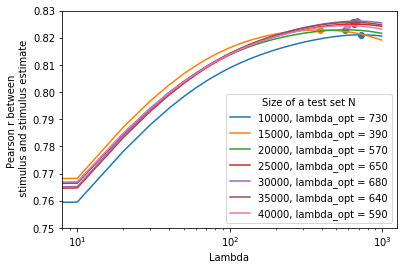

In [8]:
for i in range(len(t_stop)):
    plt.plot(lam, rs[i], label = '{}, lambda_opt = {}'.format(t_stop[i]-t_start[i], lam_max[i]))
    plt.scatter(lam_max[i], r_max[i])
plt.xlabel('Lambda')
plt.legend(title = 'Size of a test set N')
plt.xscale('log')
plt.ylim(0.75, 0.83)
plt.ylabel('Pearson r between \n stimulus and stimulus estimate')